# Linear Regression Implementation: Numpy

$$
\Large dw=\frac{1}{n} X^T (\hat{y}-y)
$$

$$
\Large db=\frac{1}{n} \sum{\hat{y}-y)}
$$

In [35]:
import numpy as np

class LinearRegressionGD:
    def __init__(self, x, y, iterations=1000, learning_rate=0.01):
        """
        x: np.array of shape (n_samples, n_features)
        y: np.array of shape (n_samples, 1)
        """
        self.x = x
        self.y = y
        self.n_iter = iterations
        self.lr = learning_rate
        self.n_samples, self.n_features = x.shape

        # weights (column vector) and bias
        self.w = np.zeros((self.n_features, 1))
        self.b = 0

    def train(self, verbose=False):
        for i in range(1, self.n_iter + 1):
            # predictions
            y_pred = self.x.dot(self.w) + self.b  # shape (n_samples,1)
            
            # residuals
            residuals = y_pred - self.y  # shape (n_samples,1)

            # gradients
            dw = (1 / self.n_samples) * self.x.T.dot(residuals)  # shape (n_features,1)
            db = np.mean(residuals)  # scalar

            # update weights
            self.w -= self.lr * dw
            self.b -= self.lr * db

            if verbose and (i % 100 == 0 or i == 1):
                RSS = np.sum(residuals ** 2)
                print(f"Iteration {i}: RSS = {RSS:.4f}, Weights = {self.w.flatten()}, Bias = {self.b:.4f}")

    def predict(self, x_new):
        """
        x_new: np.array of shape (m_samples, n_features)
        returns: np.array of shape (m_samples, 1)
        """
        return x_new.dot(self.w) + self.b


In [42]:
import numpy as np

np.random.seed(0)
x = np.random.rand(10, 2)
w_true = np.array([3, 8])
b_true = 5

y = (x.dot(w_true) + b_true + np.random.randn(10)*0.1).reshape(-1,1)

model = LinearRegressionGD(x, y, iterations=1000, learning_rate=0.1)
model.train(verbose=True)


Iteration 1: RSS = 1420.3349, Weights = [0.63579565 0.80532859], Bias = 1.1700
Iteration 100: RSS = 3.2977, Weights = [3.09150721 6.00223535], Bias = 6.2825
Iteration 200: RSS = 1.3200, Weights = [2.81320224 6.84596956], Bias = 5.8708
Iteration 300: RSS = 0.5897, Weights = [2.71037792 7.35851085], Bias = 5.5844
Iteration 400: RSS = 0.3043, Weights = [2.6819912  7.67467538], Bias = 5.3884
Iteration 500: RSS = 0.1885, Weights = [2.68250763 7.87224938], Bias = 5.2560
Iteration 600: RSS = 0.1403, Weights = [2.69222196 7.99704142], Bias = 5.1672
Iteration 700: RSS = 0.1200, Weights = [2.70318748 8.07654485], Bias = 5.1080
Iteration 800: RSS = 0.1114, Weights = [2.71263083 8.12754251], Bias = 5.0687
Iteration 900: RSS = 0.1077, Weights = [2.71992785 8.16043013], Bias = 5.0427
Iteration 1000: RSS = 0.1061, Weights = [2.72525461 8.18172656], Bias = 5.0255


# Linear Regression Implementation: List

In [8]:
def dot(a, b):
    """Dot product of two equal-length lists."""
    s = 0
    for i in range(len(a)):
        s += a[i] * b[i]
    return s

def mat_vec_dot(mat, vec):
    """Multiply matrix (list of lists) with a vector."""
    result = []
    for row in mat:
        result.append(dot(row, vec))
    return result

def transpose(mat):
    """Transpose of a matrix."""
    rows = len(mat)
    cols = len(mat[0])
    t = [[0]*rows for _ in range(cols)]
    for i in range(rows):
        for j in range(cols):
            t[j][i] = mat[i][j]
    return t

def vector_add(a, b):
    return [a[i] + b[i] for i in range(len(a))]

def vector_sub(a, b):
    return [a[i] - b[i] for i in range(len(a))]

def scalar_mul(a, s):
    return [a[i] * s for i in range(len(a))]

def sum_list(a):
    s = 0
    for i in range(len(a)):
        s += a[i]
    return s


class LinearRegression:
    def __init__(self, X, y, iterations, learning_rate):
        
        self.X = X                      # list of lists → (n, d)
        self.y = y                      # list → (n,)
        self.n_samples = len(X)
        self.n_features = len(X[0])

        self.w = [0] * self.n_features  # weights (d,)
        self.b = 0
        self.lr = learning_rate
        self.n_iter = iterations

    def train(self):
        for it in range(1, self.n_iter + 1):

            # y_pred = Xw + b
            y_pred = vector_add(mat_vec_dot(self.X, self.w), [self.b]*self.n_samples)

            # residuals = y_pred - y
            residuals = vector_sub(y_pred, self.y)

            # RSS
            RSS = sum_list([r*r for r in residuals])
            print(f"Iteration {it} – RSS = {RSS}")

            # gradients
            XT = transpose(self.X)

            # dw = (1/n) * XT * residuals
            dw = []
            for j in range(self.n_features):
                s = 0
                for i in range(self.n_samples):
                    s += XT[j][i] * residuals[i]
                dw.append(s / self.n_samples)

            # db = mean(residuals)
            db = sum_list(residuals) / self.n_samples

            # update
            self.w = vector_sub(self.w, scalar_mul(dw, self.lr))
            self.b = self.b - self.lr * db

        print("Training complete.")
        print("Final Weights:", self.w)
        print("Final Bias:", self.b)

    def predict(self, x_new):
        return dot(x_new, self.w) + self.b


In [9]:
x,y

(array([[0.5488135 , 0.71518937],
        [0.60276338, 0.54488318],
        [0.4236548 , 0.64589411],
        [0.43758721, 0.891773  ],
        [0.96366276, 0.38344152],
        [0.79172504, 0.52889492],
        [0.56804456, 0.92559664],
        [0.07103606, 0.0871293 ],
        [0.0202184 , 0.83261985],
        [0.77815675, 0.87001215]]),
 array([12.51736335, 11.14683977, 11.46942407, 13.36153607, 10.70322145,
        11.67169633, 14.19535041,  5.83592607, 11.94858942, 14.14913087]))

In [10]:
model = LinearRegression(x,y,iterations=10,learning_rate=0.1)
model.train()

Iteration 1 – RSS = 1420.3349011560201
Iteration 2 – RSS = 977.5369635798226
Iteration 3 – RSS = 673.6029474995992
Iteration 4 – RSS = 464.97573997245104
Iteration 5 – RSS = 321.7607805521279
Iteration 6 – RSS = 223.44052950639286
Iteration 7 – RSS = 155.9331784713827
Iteration 8 – RSS = 109.5739551170717
Iteration 9 – RSS = 77.72963182854312
Iteration 10 – RSS = 55.84762134621954
Training complete.
Final Weights: [np.float64(3.095300081945621), np.float64(4.067044853263164)]
Final Bias: 5.748470872011452


# Simple Linear Regression

$$
\begin{align*} \Large Y= \beta_0 + \beta_1 X + \epsilon \end{align*} 
$$

* The above equation is the population regression equation; 
* $\beta_0$ is the intercept term- that is, the expected value of $Y$ when $X=0$
* $\beta_1$ is the slope- the average increase in $Y$ associated with a one unit increase in $X$.
* The error term is a catch-all for what we miss with this simple model ( the true relationship is probably not linear, there may be other variables that cause variation in $Y$, and there may be measurement error. )
* We typically assume that the error term is independent of $X$.

The unknown coefficients $\beta_0$ and $\beta_1$ in the population regression line is unknown. We estimate these unknown coefficients using the principle of least squares.

$$
\begin{align*}\Large \hat{\beta_1} = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2} = \frac{S_{xy}}{S_{xx}}\end{align*}
$$

$$
\begin{align*}\Large \hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}\end{align*}
$$

- For each 1-unit increase in the predictor, the predicted value of the target increases by (coefficient × unit of target), holding all other variables constant.

In [ ]:
np.random.seed(10)
x = np.random.uniform(0,1,10) 
x

array([0.77132064, 0.02075195, 0.63364823, 0.74880388, 0.49850701,
       0.22479665, 0.19806286, 0.76053071, 0.16911084, 0.08833981])

In [13]:
np.random.uniform(0,100,(2,5,3))

array([[[68.53598184, 95.33933462,  0.39482663],
        [51.21922634, 81.26209617, 61.25260668],
        [72.17553174, 29.18760682, 91.77741225],
        [71.45757834, 54.2544368 , 14.21700476],
        [37.33407601, 67.41336151, 44.18331744]],

       [[43.40139933, 61.77669785, 51.31382426],
        [65.03971819, 60.10389534, 80.52231968],
        [52.16471524, 90.86488808, 31.9236089 ],
        [ 9.04593493, 30.07000566, 11.39843619],
        [82.86813263,  4.68963194, 62.62871483]]])

In [20]:
# Step 0: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# -----------------------------
# Step 1: Generate synthetic data
# -----------------------------
np.random.seed(42)  # for reproducibility

# Population parameters
beta_0 = 2
beta_1 = 9
n = 20  # number of samples

# Generate feature X
X = np.random.uniform(0, 10, n)

# Generate error term
epsilon = np.random.normal(0, 2, n)  # mean 0, std 2

# Generate response Y
Y = beta_0 + beta_1 * X + epsilon

In [27]:
Y

array([33.68294846, 88.19278224, 66.06340661, 53.05465618, 18.97297518,
       15.58795423,  7.3625815 , 77.10635675, 55.01158561, 65.94837718,
        1.55061733, 90.04328273, 75.71856029, 20.52713246, 17.16083382,
       22.21096226, 29.35480742, 47.11265699, 42.5201415 , 25.76893532])

In [31]:
X.shape

(20,)

In [32]:
X.reshape(-1,1).shape

(20, 1)

In [33]:
# SHOWING X AND Y TOGETHER ; X|Y 
XY = np.hstack((X.reshape(-1,1),Y.reshape(-1,1)))
print(XY)

[[ 3.74540119 33.68294846]
 [ 9.50714306 88.19278224]
 [ 7.31993942 66.06340661]
 [ 5.98658484 53.05465618]
 [ 1.5601864  18.97297518]
 [ 1.5599452  15.58795423]
 [ 0.58083612  7.3625815 ]
 [ 8.66176146 77.10635675]
 [ 6.01115012 55.01158561]
 [ 7.08072578 65.94837718]
 [ 0.20584494  1.55061733]
 [ 9.69909852 90.04328273]
 [ 8.32442641 75.71856029]
 [ 2.12339111 20.52713246]
 [ 1.81824967 17.16083382]
 [ 1.8340451  22.21096226]
 [ 3.04242243 29.35480742]
 [ 5.24756432 47.11265699]
 [ 4.31945019 42.5201415 ]
 [ 2.9122914  25.76893532]]


Manual OLS estimates:
beta_0_hat: 1.9272100060006352
beta_1_hat: 8.896693053313527


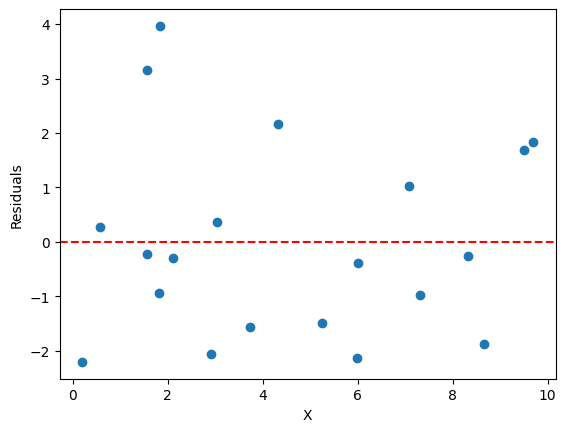

In [34]:
# -----------------------------
# Step 2: Manual OLS estimation
# -----------------------------
x_mean = np.mean(X)
y_mean = np.mean(Y)

S_xx = np.sum((X - x_mean)**2)
S_xy = np.sum((X - x_mean)*(Y - y_mean))

# Estimated coefficients
beta_1_hat = S_xy / S_xx
beta_0_hat = y_mean - beta_1_hat * x_mean

print("Manual OLS estimates:")
print("beta_0_hat:", beta_0_hat)
print("beta_1_hat:", beta_1_hat)

# Fitted values and residuals
Y_hat = beta_0_hat + beta_1_hat * X
residuals = Y - Y_hat

# Optional: residual plot
plt.scatter(X, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.show()


In [36]:
# -----------------------------
# Step 3: Library implementation
# -----------------------------
# Using sklearn
X_reshaped = X.reshape(-1, 1)  # sklearn expects 2D array
model = LinearRegression()
model.fit(X_reshaped, Y)

print("Sklearn estimates:")
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

Sklearn estimates:
Intercept: 1.9272100060006139
Slope: 8.896693053313532


In [37]:
# Using statsmodels (provides more statistics)
X_sm = sm.add_constant(X)  # adds intercept term
model_sm = sm.OLS(Y, X_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     4131.
Date:                Sat, 31 Jan 2026   Prob (F-statistic):           1.01e-22
Time:                        15:11:27   Log-Likelihood:                -39.698
No. Observations:                  20   AIC:                             83.40
Df Residuals:                      18   BIC:                             85.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9272      0.757      2.544      0.0

# Standard Errors of Estimates

$$
\Large SE(\hat{\beta}_j) = \sqrt{\,RSE^2 \cdot \left( (X^\top X)^{-1} \right)_{jj} }
$$

In [ ]:
import numpy as np
from scipy import stats
RSS = np.sum(residuals**2)
n = len(X)
RSE = np.sqrt(RSS / (n - 2))
print("Residual Standard Error (RSE):", RSE)


S_xx = np.sum((X - np.mean(X))**2)
SE_beta_1 = RSE / np.sqrt(S_xx)
SE_beta_0 = RSE * np.sqrt(1/n + (np.mean(X)**2)/S_xx)
print("Standard error of beta_1_hat:", SE_beta_1)
print("Standard error of beta_0_hat:", SE_beta_0)

t_beta_1 = beta_1_hat / SE_beta_1
t_beta_0 = beta_0_hat / SE_beta_0
print("t-statistic for beta_1:", t_beta_1)
print("t-statistic for beta_0:", t_beta_0)

df = n - 2 
p_beta_1 = 2 * (1 - stats.t.cdf(np.abs(t_beta_1), df))
p_beta_0 = 2 * (1 - stats.t.cdf(np.abs(t_beta_0), df))
print("p-value for beta_1:", p_beta_1)
print("p-value for beta_0:", p_beta_0)


import statsmodels.api as sm
X_sm = sm.add_constant(X)
model_sm = sm.OLS(Y, X_sm).fit()
print(model_sm.summary())

Residual Standard Error (RSE): 1.851880962414395
Standard error of beta_1_hat: 0.09157833418658523
Standard error of beta_0_hat: 0.48513406423868727
t-statistic for beta_1: 32.27087746266875
t-statistic for beta_0: 4.521180248143994
p-value for beta_1: 0.0
p-value for beta_0: 4.028650715981463e-05
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     1041.
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           3.35e-34
Time:                        02:00:52   Log-Likelihood:                -100.74
No. Observations:                  50   AIC:                             205.5
Df Residuals:                      48   BIC:                             209.3
Df Model:                           1                                

# Estimate of the sd of the error term : RSE
The Residual Standard Error (RSE) is an estimate of the standard deviation of the error term ,$\sigma$
in the regression model:
$$
\begin{align*}\Large RSE = \sqrt{\frac{1}{n-p-1}RSS} = \sqrt{\frac{1}{n-p-1} \sum_{i=1}^{n} (y_i-\hat{y_i})^2}\end{align*}
$$

In [3]:
import numpy as np
np.random.seed(0)
n = 10
x1 = np.random.uniform(0, 10, n)
x2 = np.random.uniform(0, 5, n)
eps = np.random.normal(0, 2, n)
y = 3 + 9*x1 - 2*x2 + eps

X = np.column_stack((np.ones(n), x1, x2))  # intercept + predictors
p = X.shape[1] - 1                         # number of predictors
print('Design Matrix X:')
print(X) 

XtX = X.T @ X
XtY = X.T @ y
beta_hat = np.linalg.inv(XtX) @ XtY


y_hat = X @ beta_hat
residuals = y - y_hat


RSS = np.sum(residuals**2)

# -------------------------------
# 6. Estimate sigma^2 and RSE
# -------------------------------
sigma2_hat = RSS / (n - (p + 1))    # this is RSE^2
RSE = np.sqrt(sigma2_hat)

# -------------------------------
# 7. Covariance matrix of beta-hat
# -------------------------------
cov_beta = sigma2_hat * np.linalg.inv(XtX)
print('Covariance matrix of beta_hat:')
print(cov_beta)


# -------------------------------
# 8. Standard errors of coefficients
# -------------------------------
SE_beta = np.sqrt(np.diag(cov_beta))

# -------------------------------
# 9. Print results
# -------------------------------
print("Estimated coefficients (beta_hat):")
print(beta_hat)

print("\nStandard errors of coefficients:")
print(SE_beta)

print("\nRSE (estimate of sigma):", RSE)
print("Estimated sigma^2:", sigma2_hat)


Design Matrix X:
[[1.         5.48813504 3.95862519]
 [1.         7.15189366 2.6444746 ]
 [1.         6.02763376 2.84022281]
 [1.         5.44883183 4.62798319]
 [1.         4.23654799 0.35518029]
 [1.         6.45894113 0.4356465 ]
 [1.         4.37587211 0.10109199]
 [1.         8.91773001 4.16309923]
 [1.         9.63662761 3.89078375]
 [1.         3.83441519 4.35006074]]
Covariance matrix of beta_hat:
[[10.01323021 -1.37892732 -0.26145305]
 [-1.37892732  0.26702061 -0.09693936]
 [-0.26145305 -0.09693936  0.31365063]]
Estimated coefficients (beta_hat):
[-1.31072681  9.76157296 -2.1540336 ]

Standard errors of coefficients:
[3.16436885 0.51674037 0.5600452 ]

RSE (estimate of sigma): 2.840312935394945
Estimated sigma^2: 8.067377570971848


# R2 Statistic
R2 measures the proportion of variability in y that can be explained using x.
$$
\begin{align*}\Large R^2 = \frac{TSS-RSS}{TSS} = 1- \frac{RSS}{TSS}\end{align*}
$$


# Hypothesis Testing

$H_0$ : There is no relationship between $X$ and $Y$ ($\beta_1 = 0$)

$H_1$ : There is some relationship between $X$ and $Y$ ($\beta_1 != 0$)

$$
\begin{align*}\Large t = \frac{\hat{\beta_1}-0}{SE(\hat{\beta_1})}\end{align*}
$$


# Correlation and Covariance

$$
\begin{align*}\Large Cor(X,Y) = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum(x_i-\bar{x})^2 \sum(y_i-\bar{y})^2}}\end{align*}
$$

$$
\begin{equation*}\Large cov(X, Y) = \frac{\sum{(X_i - \bar{X})(Y_i - \bar{Y})}}{N}\end{equation*}
$$

$$
\begin{equation*}\Large r = \frac{cov(X, Y)}{\sqrt{var(X) \cdot var(Y)}}\end{equation*}
$$

# MLR - Matrix Formulation

$$
\Large \hat{\beta}=(X^{'}X)^{-1}X^{'}Y
$$

In [4]:
# https://online.stat.psu.edu/stat462/node/132/

In [ ]:
import numpy as np

# -----------------------------
# Step 0: Synthetic data
# -----------------------------
np.random.seed(42)
n = 50
X1 = np.random.uniform(0, 10, n)
X2 = np.random.uniform(0, 5, n)
epsilon = np.random.normal(0, 1.5, n)
Y = 1 + 2*X1 + 3*X2 + epsilon  # true coefficients: b0=1, b1=2, b2=3

# -----------------------------
# Step 1: Construct design matrix
# -----------------------------
X = np.column_stack((np.ones(n), X1, X2))  # add intercept column

# -----------------------------
# Step 2: Compute coefficients manually
# -----------------------------
XtX = X.T @ X          # X'X
XtY = X.T @ Y          # X'Y
b_hat = np.linalg.inv(XtX) @ XtY  # (X'X)^-1 X'Y

print("Estimated coefficients (manual matrix solution):")
print("b0, b1, b2 =", b_hat)

# -----------------------------
# Step 3: Compare with library
# -----------------------------
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(np.column_stack((X1, X2)), Y)  # sklearn adds intercept automatically
print("Sklearn estimates:")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Estimated coefficients (manual matrix solution):
b0, b1, b2 = [2.04263922 1.80059114 2.94957677]
Sklearn estimates:
Intercept: 2.0426392177796036
Coefficients: [1.80059114 2.94957677]


# F - test in regression analysis 

- Is at least one of the predictors $X_1,X_2,...,X_p$ useful in predicting the response?
- Do all the predictors help to explain $Y$, or is only a subset of the predictors useful?
- $H_o : \beta_1 = \beta_2 = ... = \beta_p = 0$ versus the alternative
- $H_a :$ at least one $\beta_j$ is non-zero.

$$
\begin{align*}\Large F = \frac{(TSS-RSS)/p}{RSS/(n-p-1}\end{align*}
$$

 - IF f statistic takes a value close to 1, then we cannot expect any relationship between the response and predictors. 
 - Larger the f value higher the the evidence against the null hypothesis.

 - Sometimes, we want to test that a particular subset of q of the coefficents are zero. 
 - In this case we fit two model and compute their respective RSS value(with and without that particular subset). 

$$
\Large F = \frac{ (RSS_{\text{reduced}} - RSS_{\text{full}}) / q }{ RSS_{\text{full}} / (n - p - 1) }
$$

In [13]:
import numpy as np
from scipy import stats

# -----------------------------
# Step 0: Synthetic data
# -----------------------------
np.random.seed(42)
n = 50
p = 3  # number of predictors
X1 = np.random.uniform(0, 10, n)
X2 = np.random.uniform(0, 5, n)
X3 = np.random.uniform(-5, 5, n)
epsilon = np.random.normal(0, 1.5, n)
Y = 1 + 2*X1 + 3*X2 + 0*X3 + epsilon  # X3 has no effect

# Construct design matrix
X = np.column_stack((np.ones(n), X1, X2, X3))  # intercept + predictors

# -----------------------------
# Step 1: Fit model (manual matrix solution)
# -----------------------------
b_hat = np.linalg.inv(X.T @ X) @ (X.T @ Y)
Y_hat = X @ b_hat
residuals = Y - Y_hat

# -----------------------------
# Step 2: Compute TSS, RSS
# -----------------------------
TSS = np.sum((Y - np.mean(Y))**2)
RSS = np.sum(residuals**2)

# -----------------------------
# Step 3: Compute F-statistic
# -----------------------------
F_stat = ((TSS - RSS)/p) / (RSS/(n - p - 1))
p_value = 1 - stats.f.cdf(F_stat, p, n - p - 1)

print("F-statistic:", F_stat)
print("p-value:", p_value)

# -----------------------------
# Step 4: Compare with statsmodels
# -----------------------------
import statsmodels.api as sm
X_sm = sm.add_constant(np.column_stack((X1, X2, X3)))
model_sm = sm.OLS(Y, X_sm).fit()
print(model_sm.summary())


F-statistic: 421.58128000027176
p-value: 0.0
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     421.6
Date:                Sun, 01 Feb 2026   Prob (F-statistic):           1.88e-33
Time:                        14:29:32   Log-Likelihood:                -87.830
No. Observations:                  50   AIC:                             183.7
Df Residuals:                      46   BIC:                             191.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

# Adjusted R2
$$
\begin{align*}\Large Adjusted R^2 = 1 - \frac{(1-R^2)(N-1)}{N-p-1}\end{align*}
$$

# AIC & BIC Calculation

 - Both AIC & BIC are model selection criteria.
 - They penalize overfitting
 - Balances Goodness-of-fit & Model Complexity
 - Useful if we want to compare non-nested models ( models with different structures,not subsets)

$$
AIC = n \log\left(\frac{RSS}{n}\right) + 2k
$$ 
$$
BIC = n \log\left(\frac{RSS}{n}\right) + k\log(n)
$$ 

# Confidence Intervals & Prediction Intervals

A confidence interval provides a range of values within which you can expect the true population parameter to fall. 

# OSL Violations

1. Multicollinearity
     - Two or more independent explanatory variables have high correlation among them.
     - multicollinearity increases the variance of the coefficient, this further increases the width of confidence interval. 
     - we can combine both variables, or use alternate specifications.
     - conventional diagnosis is by using vif ( variance inflation factor)
    - warnings signs of multicollinearity:
    - high r2 but insignificant(Individual predictors have high p-values)
    - coefficient are opposite signs of their expected.
    - add or remove one fetaure the regression coefcient changes dramatically.
    - add or delete observation the regression coefficients may change substantially.
    
2. Heteroskedasticity : violation of constant variance of error term. 
    - heteroskedasticity refers to situvations where the variance of the residuals is unequal over
    a range of measured values.
    - Unequal scatterof the residuals.
    - plot of residuals vs predicted values.
    - formally we diagnose this using breusch-pagan test.
    - on violation we end up in biased and inefficient estimators
    
3. Non-Normality : Violation of identical distribution of error terms
    - calculation of confidence intervals and various significance tests for coefficients are all
    based on the assumptions of normally distributed errors. 
    - detection is by creating QQ Plot,shapiro-wilk test,kolmogorov smirnov,anderson darling
    - identify the source of non-normality : outliers and non-normal distribution
    - respecification of model( alternate functional)
    - logs
    - omitted explanotory variables
    - box-cox transformation
4. Serial Correlation or Auto Correlation: Violation of Independently distributed error terms
    - Relationship between a given variable and a lagged version of itself over various
    time intervals.
    - auto correlation diagonosis is through durbin watson test.

In [14]:
import numpy as np
from scipy import stats

class LinearRegressionClosedForm:
    def __init__(self, add_intercept=True):
        self.add_intercept = add_intercept
        self.coef_ = None        # b vector
        self.fitted_ = None      # y_hat
        self.residuals_ = None
        self.RSS = None
        self.TSS = None
        self.RSE = None
        self.SE_ = None
        self.t_stats_ = None
        self.p_values_ = None
        self.R2 = None
        self.F_stat = None
        self.F_p_value = None

    def fit(self, X, Y):
        """Fit linear regression using closed-form solution"""
        X = np.array(X)
        Y = np.array(Y).reshape(-1,1)
        n_samples, n_features = X.shape

        if self.add_intercept:
            X = np.column_stack((np.ones(n_samples), X))
        
        self.X = X
        self.Y = Y
        self.n = n_samples
        self.p = X.shape[1] - 1  # number of predictors excluding intercept
        
        # Closed-form solution
        XtX_inv = np.linalg.inv(X.T @ X)
        self.coef_ = XtX_inv @ X.T @ Y  # shape (p+1, 1)
        self.fitted_ = X @ self.coef_
        self.residuals_ = Y - self.fitted_
        
        # RSS and TSS
        self.RSS = np.sum(self.residuals_**2)
        self.TSS = np.sum((Y - np.mean(Y))**2)
        
        # RSE
        self.RSE = np.sqrt(self.RSS / (self.n - (self.p + 1)))
        
        # R²
        self.R2 = 1 - self.RSS / self.TSS
        
        # Standard errors of coefficients
        self.SE_ = np.sqrt(np.diag(XtX_inv) * self.RSE**2).reshape(-1,1)
        
        # t-statistics
        self.t_stats_ = self.coef_ / self.SE_
        
        # p-values (two-tailed)
        df = self.n - (self.p + 1)
        self.p_values_ = 2 * (1 - stats.t.cdf(np.abs(self.t_stats_), df))
        
        # F-statistic
        self.F_stat = ((self.TSS - self.RSS)/self.p) / (self.RSS / (self.n - self.p - 1))
        self.F_p_value = 1 - stats.f.cdf(self.F_stat, self.p, self.n - self.p - 1)
        
        return self

    def summary(self):
        """Print summary table similar to statsmodels"""
        print("Linear Regression Summary (Closed Form)")
        print("="*50)
        print(f"{'Coef':>8} {'StdErr':>10} {'t':>8} {'P>|t|':>8}")
        for i in range(len(self.coef_)):
            print(f"{self.coef_[i,0]:8.4f} {self.SE_[i,0]:10.4f} {self.t_stats_[i,0]:8.4f} {self.p_values_[i,0]:8.4f}")
        print("-"*50)
        print(f"Residual standard error: {self.RSE:.4f} on {self.n - (self.p+1)} degrees of freedom")
        print(f"R-squared: {self.R2:.4f}")
        print(f"F-statistic: {self.F_stat:.4f} on {self.p} and {self.n - (self.p+1)} DF, p-value: {self.F_p_value:.4f}")
        print("="*50)
        return self


In [15]:
# Synthetic data
np.random.seed(42)
n = 50
X1 = np.random.uniform(0, 10, n)
X2 = np.random.uniform(0, 5, n)
epsilon = np.random.normal(0, 2, n)
Y = 1 + 2*X1 + 3*X2 + epsilon

# Fit model
model_gd = LinearRegressionClosedForm()
model_gd.fit(np.column_stack((X1,X2)), Y)
model_gd.summary()

# Access residuals and fitted values
residuals_gd = model_gd.residuals_
fitted_gd = model_gd.fitted_

Linear Regression Summary (Closed Form)
    Coef     StdErr        t    P>|t|
  2.3902     0.5960   4.0107   0.0002
  1.7341     0.0868  19.9739   0.0000
  2.9328     0.1635  17.9400   0.0000
--------------------------------------------------
Residual standard error: 1.7522 on 47 degrees of freedom
R-squared: 0.9424
F-statistic: 384.1773 on 2 and 47 DF, p-value: 0.0000


# Residual Diagnostics 

## residuals vs fitted

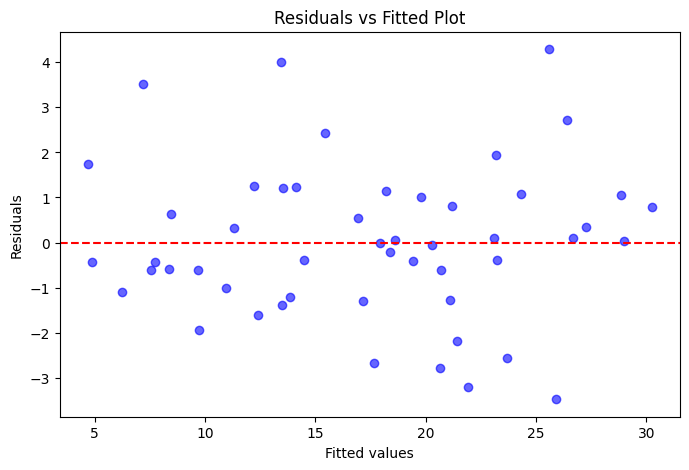

In [16]:
import matplotlib.pyplot as plt

# Residuals vs Fitted
plt.figure(figsize=(8,5))
plt.scatter(fitted_gd, residuals_gd, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Plot")
plt.show()

## Q-Q plot ( Qunatile - Quantile)
A Q–Q plot compares the quantiles of the residuals to those of a normal distribution; points on a straight line indicate normality, while systematic deviations reveal skewness, heavy tails, or outliers.

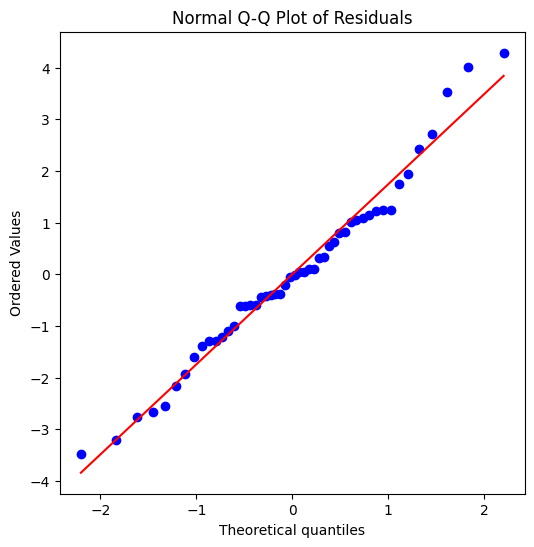

In [17]:
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.figure(figsize=(6,6))
stats.probplot(residuals_gd.flatten(), dist="norm", plot=plt)
plt.title("Normal Q-Q Plot of Residuals")
plt.show()

## Shapiro-wilk test for normality

In [18]:
from scipy.stats import shapiro, kstest, anderson, norm

residuals_flat = residuals_gd.flatten()  # flatten residuals

stat_sw, p_sw = shapiro(residuals_flat)
print("Shapiro-Wilk test statistic:", stat_sw)
print("Shapiro-Wilk p-value:", p_sw)
if p_sw > 0.05:
    print("Shapiro-Wilk: Fail to reject H0 → residuals approximately normal")
else:
    print("Shapiro-Wilk: Reject H0 → residuals NOT normal")
print("-"*50)

Shapiro-Wilk test statistic: 0.9777858653166145
Shapiro-Wilk p-value: 0.4628349322054209
Shapiro-Wilk: Fail to reject H0 → residuals approximately normal
--------------------------------------------------


## Kolmogorov-Smirnov: Normality

In [19]:
# K-S test requires standardized residuals
res_std = (residuals_flat - np.mean(residuals_flat)) / np.std(residuals_flat, ddof=1)
stat_ks, p_ks = kstest(res_std, 'norm')
print("Kolmogorov-Smirnov test statistic:", stat_ks)
print("Kolmogorov-Smirnov p-value:", p_ks)
if p_ks > 0.05:
    print("K-S: Fail to reject H0 → residuals approximately normal")
else:
    print("K-S: Reject H0 → residuals NOT normal")
print("-"*50)

Kolmogorov-Smirnov test statistic: 0.09396270049865418
Kolmogorov-Smirnov p-value: 0.7339148341223681
K-S: Fail to reject H0 → residuals approximately normal
--------------------------------------------------


## Anderson-Darling Test : Normality

In [20]:
result_ad = anderson(residuals_flat, dist='norm')
print("Anderson-Darling statistic:", result_ad.statistic)
for sl, cv in zip(result_ad.significance_level, result_ad.critical_values):
    if result_ad.statistic < cv:
        conclusion = "Fail to reject H0 → residuals approximately normal"
    else:
        conclusion = "Reject H0 → residuals NOT normal"
    print(f"Significance level {sl}%: critical value {cv:.4f}, conclusion: {conclusion}")


Anderson-Darling statistic: 0.35147196611838183
Significance level 15.0%: critical value 0.5520, conclusion: Fail to reject H0 → residuals approximately normal
Significance level 10.0%: critical value 0.6210, conclusion: Fail to reject H0 → residuals approximately normal
Significance level 5.0%: critical value 0.7400, conclusion: Fail to reject H0 → residuals approximately normal
Significance level 2.5%: critical value 0.8590, conclusion: Fail to reject H0 → residuals approximately normal
Significance level 1.0%: critical value 1.0190, conclusion: Fail to reject H0 → residuals approximately normal


/var/folders/g_/3c_6kpmx2bjfdp8r4138_s680000gn/T/ipykernel_1347/3202472038.py:1: FutureWarning: As of SciPy 1.17, users must choose a p-value calculation method by providing the `method` parameter. `method='interpolate'` interpolates the p-value from pre-calculated tables; `method` may also be an instance of `MonteCarloMethod` to approximate the p-value via Monte Carlo simulation. When `method` is specified, the result object will include a `pvalue` attribute and not attributes `critical_value`, `significance_level`, or `fit_result`. Beginning in 1.19.0, these other attributes will no longer be available, and a p-value will always be computed according to one of the available `method` options.
  result_ad = anderson(residuals_flat, dist='norm')


## One-sample t-test for mean of residuals=0
- Null ; Residuals has zero mean 
- Alternative : Mean is not zero
$$
t = \frac{\bar{e}}{s_e / \sqrt{n}}
$$

$$
\bar{e} \text{ = mean of residuals}, \quad 
s_e \text{ = standard deviation of residuals}, \quad
n \text{ = number of residuals}
$$

In [21]:
from scipy.stats import ttest_1samp

# Flatten residuals
residuals_flat = residuals_gd.flatten()

# One-sample t-test against 0
t_stat, p_value = ttest_1samp(residuals_flat, 0)
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpretation
if p_value > 0.05:
    print("Fail to reject H0 → residuals have mean approximately zero")
else:
    print("Reject H0 → residuals have mean significantly different from zero")

t-statistic: 6.1481951460665455e-15
p-value: 0.9999999999999951
Fail to reject H0 → residuals have mean approximately zero


## Leverage Plot
 - Helps visualize influential points.
 - For some observations, even if its residual is small, it has the potential to influence the estimated model than the other observations.
 - Cook’s distance measures the overall influence of an observation on the fitted regression coefficients.

In [34]:
import numpy as np
X = np.array([
    [1, 1],
    [1, 2],
    [1, 10]
])

# Hat matrix
H = X @ np.linalg.inv(X.T @ X) @ X.T

# Leverage values (diagonal)
leverage = np.diag(H)

print("Hat matrix H:\n", H)
print("\nLeverage values (h_ii):", leverage)

# observation 3 has the highest leverage, because it is far from the mean of X values.

Hat matrix H:
 [[ 0.56164384  0.49315068 -0.05479452]
 [ 0.49315068  0.44520548  0.06164384]
 [-0.05479452  0.06164384  0.99315068]]

Leverage values (h_ii): [0.56164384 0.44520548 0.99315068]


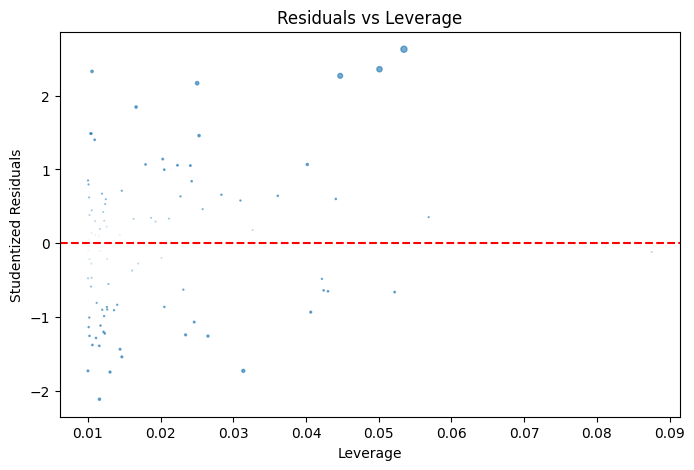

High leverage cutoff: 0.0400
High leverage points (indices): [ 3  6 13 14 20 31 37 49 71 73 74 79 82]


In [33]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

np.random.seed(42)
n = 100
X = np.random.randn(n, 1)
y = 3 + 2*X[:,0] + np.random.randn(n)*0.7
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()
fitted = model.fittedvalues
resid = model.resid

# Hat matrix and leverage
H = X_with_const @ np.linalg.inv(X_with_const.T @ X_with_const) @ X_with_const.T
leverage = np.diag(H)
p_plus1 = X_with_const.shape[1]

# Internally studentized residuals
studentized_residuals = resid / (model.mse_resid**0.5 * np.sqrt(1 - leverage))

# Cook's distance
cooks_d = (studentized_residuals**2 / p_plus1) * (leverage / (1 - leverage))

# High leverage cutoff
high_leverage_cutoff = 2 * p_plus1 / n
high_leverage_points = np.where(leverage > high_leverage_cutoff)[0]

# Plot
plt.figure(figsize=(8,5))
plt.scatter(leverage, studentized_residuals, s=100*cooks_d, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Leverage")
plt.ylabel("Studentized Residuals")
plt.title("Residuals vs Leverage")
plt.show()

print(f"High leverage cutoff: {high_leverage_cutoff:.4f}")
print("High leverage points (indices):", high_leverage_points)


## Scale-Location Plot
 - The scale–location plot is used to check the homoskedasticity assumption in linear regression — i.e., that the variance of the residuals is constant across all fitted values.
 - If heteroskedasticity exists:
    - Upward curve → residuals get more spread out for large fitted values - (classic funnel shape: variance increasing)
    - Downward curve → variance decreases with fitted values
    - Any systematic shape → variance depends on the predicted values

In [32]:
residuals_gd.shape,residuals_gd.flatten().reshape(-1,1).shape,residuals_gd.flatten().shape

((50, 1), (50, 1), (50,))

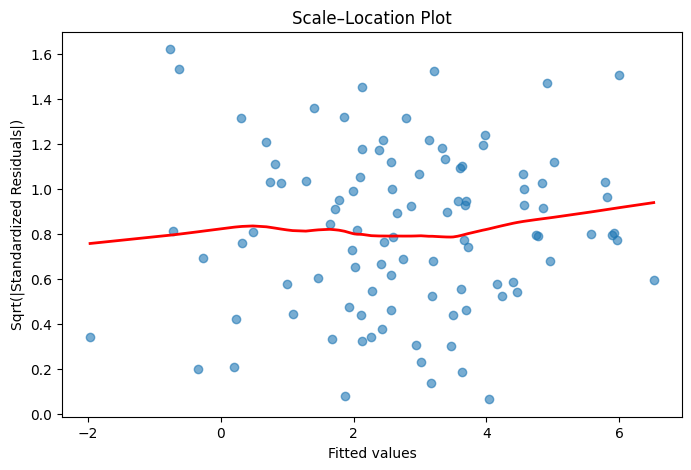

In [30]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
np.random.seed(42)
n = 100
X = np.random.randn(n, 1)
y = 3 + 2*X[:,0] + np.random.randn(n)*0.7
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()
fitted = model.fittedvalues
resid = model.resid


hat_matrix = X_with_const @ np.linalg.inv(X_with_const.T @ X_with_const) @ X_with_const.T
leverage = np.diag(hat_matrix)

sigma_hat = np.sqrt(model.ssr / model.df_resid)  # RSE
std_resid = resid / (sigma_hat * np.sqrt(1 - leverage))


sqrt_std_resid = np.sqrt(np.abs(std_resid))

lowess = sm.nonparametric.lowess
z = lowess(sqrt_std_resid, fitted)

plt.figure(figsize=(8,5))
plt.scatter(fitted, sqrt_std_resid, alpha=0.6)
plt.plot(z[:,0], z[:,1], color='red', linewidth=2)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt(|Standardized Residuals|)")
plt.title("Scale–Location Plot")
plt.show()


## Breusch–Pagan Test for Homoscedasticity

- Null hypothesis : The error variance is constant (homoscedastic).  
- Alternative hypothesis : Error variance depends on predictors (heteroscedastic).
$$
\hat{\varepsilon}_i^2
$$

- Optionally they may be standardized by dividing by $\hat{\sigma}^2$, but this is not required.
- Run the auxiliary regression
- Regress the squared residuals on the original predictors:
$$
\hat{\varepsilon}_i^{\,2} = \gamma_0 + \gamma_1 x_{i1} + \cdots + \gamma_p x_{ip} + u_i
$$

- Let $R_{\text{aux}}^2$ be the $R^2$ from this regression.
- Compute the Breusch–Pagan statistic

$$
W = n \, R_{\text{aux}}^{2}
$$
- Distribution under the null
$$
W \sim \chi^2_{p}
$$


In [24]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Fit OLS using statsmodels to use BP test
X_sm = sm.add_constant(X)  # add intercept
ols_model = sm.OLS(Y, X_sm).fit()

# Breusch-Pagan test
bp_test = het_breuschpagan(ols_model.resid, ols_model.model.exog)
lm_stat, lm_pvalue, f_stat, f_pvalue = bp_test

print("Breusch-Pagan test LM statistic:", lm_stat)
print("Breusch-Pagan test LM p-value:", lm_pvalue)
print("Breusch-Pagan test F-statistic:", f_stat)
print("Breusch-Pagan test F p-value:", f_pvalue)

# Interpretation
if lm_pvalue > 0.05:
    print("Fail to reject H0 → residuals are homoscedastic")
else:
    print("Reject H0 → residuals are heteroscedastic")


Breusch-Pagan test LM statistic: 1.3043511450153922
Breusch-Pagan test LM p-value: 0.5209112628774253
Breusch-Pagan test F-statistic: 0.6294659302958252
Breusch-Pagan test F p-value: 0.5373083488828334
Fail to reject H0 → residuals are homoscedastic


## Durbin-Watson Test for Autocorrelation of Residuals

 - h0 : first order autocorrelation does not exists
 - h1 : first order autocorrelation exists

 $$
 d = \frac{\sum_{t=2}^{T} (e_t - e_{t-1}^2)}{\sum_{t=1}^{T} e_t^2}
 $$
  - if the d is in the range of 1.5 to 2.5 ( little or no autocorrelation)
  - if it is >2.5 ; negative autocorrelation
  - if it is <1.5 ; positive autocorrelation

In [25]:
from statsmodels.stats.stattools import durbin_watson

residuals_flat = residuals_gd.flatten()

dw_stat = durbin_watson(residuals_flat)
print("Durbin-Watson statistic:", dw_stat)


Durbin-Watson statistic: 2.027047062921688


## VIF - Test for Multicollinearity
$$
VIF_{j} = \frac{1}{1-R_j^2}
$$
 - $R_j^2$  - R-squared from regressing predictor $X_j$ on all the other predictors.
 - If VIF value is > 10 , there is severe multicollinearity.

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X, thresh=10.0):
    """
    Iteratively remove predictors with VIF > thresh
    """
    X = pd.DataFrame(X)
    while True:
        vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        max_vif = max(vif)
        if max_vif > thresh:
            max_idx = vif.index(max_vif)
            print(f"Dropping X{max_idx} with VIF={max_vif:.2f}")
            X = X.drop(X.columns[max_idx], axis=1)
        else:
            break
    return X, vif

# Example usage
X_final, vif_final = calculate_vif(X[:,1:], thresh=5)  # exclude intercept
print("Remaining predictors after VIF check:", X_final.columns)

Remaining predictors after VIF check: RangeIndex(start=0, stop=3, step=1)


## Diagnostic Test Class - Code Snippet

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import shapiro, kstest, anderson, ttest_1samp, norm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

class RegressionDiagnostics:
    def __init__(self, X, Y, fitted, residuals, add_intercept=True):
        """
        X: original predictor matrix (without intercept)
        Y: response vector
        fitted: fitted values
        residuals: residuals (Y - fitted)
        """
        self.X = np.array(X)
        self.Y = np.array(Y).reshape(-1,1)
        self.fitted = np.array(fitted).reshape(-1,1)
        self.residuals = np.array(residuals).reshape(-1,1)
        self.n = self.Y.shape[0]
        self.add_intercept = add_intercept
        self.p = self.X.shape[1]
        if add_intercept:
            self.X_with_intercept = np.column_stack((np.ones(self.n), self.X))
        else:
            self.X_with_intercept = self.X

    def residuals_vs_fitted(self):
        plt.figure(figsize=(7,5))
        plt.scatter(self.fitted, self.residuals, alpha=0.6)
        plt.axhline(0, color='red', linestyle='--')
        plt.xlabel("Fitted values")
        plt.ylabel("Residuals")
        plt.title("Residuals vs Fitted")
        plt.show()

    def qq_plot(self):
        plt.figure(figsize=(6,6))
        sm.qqplot(self.residuals.flatten(), line='45', fit=True)
        plt.title("Normal Q-Q Plot of Residuals")
        plt.show()

    def normality_tests(self):
        r = self.residuals.flatten()
        print("=== Normality Tests ===")
        # Shapiro-Wilk
        stat_sw, p_sw = shapiro(r)
        print(f"Shapiro-Wilk: stat={stat_sw:.4f}, p={p_sw:.4f} → {'normal' if p_sw>0.05 else 'NOT normal'}")
        # Kolmogorov-Smirnov
        r_std = (r - np.mean(r)) / np.std(r, ddof=1)
        stat_ks, p_ks = kstest(r_std, 'norm')
        print(f"Kolmogorov-Smirnov: stat={stat_ks:.4f}, p={p_ks:.4f} → {'normal' if p_ks>0.05 else 'NOT normal'}")
        # Anderson-Darling
        result_ad = anderson(r, dist='norm')
        print(f"Anderson-Darling statistic: {result_ad.statistic:.4f}")
        for sl, cv in zip(result_ad.significance_level, result_ad.critical_values):
            conclusion = "normal" if result_ad.statistic < cv else "NOT normal"
            print(f"  Significance {sl}%: critical={cv:.4f}, conclusion: {conclusion}")

    def mean_residual_test(self):
        r = self.residuals.flatten()
        t_stat, p_val = ttest_1samp(r, 0)
        print("=== Mean of Residuals Test ===")
        print(f"t-statistic: {t_stat:.4f}, p-value: {p_val:.4f} → {'mean ~ 0' if p_val>0.05 else 'mean != 0'}")

    def residuals_vs_leverage(self):
        X = self.X_with_intercept
        H = X @ np.linalg.pinv(X.T @ X) @ X.T
        leverage = np.diag(H)
        student_resid = self.residuals.flatten() / (np.std(self.residuals.flatten(), ddof=self.p+1) * np.sqrt(1 - leverage))
        plt.figure(figsize=(7,5))
        plt.scatter(leverage, student_resid, alpha=0.6)
        plt.axhline(0, color='red', linestyle='--')
        plt.xlabel("Leverage")
        plt.ylabel("Studentized Residuals")
        plt.title("Residuals vs Leverage")
        plt.show()
        cutoff = 2 * (self.p + 1) / self.n
        print(f"High leverage cutoff: {cutoff:.4f}")
        high_lev_points = np.where(leverage > cutoff)[0]
        print("High leverage points (indices):", high_lev_points)

    def scale_location_plot(self):
        std_resid = self.residuals.flatten() / np.std(self.residuals.flatten(), ddof=self.p+1)
        sqrt_std_resid = np.sqrt(np.abs(std_resid))
        plt.figure(figsize=(7,5))
        plt.scatter(self.fitted, sqrt_std_resid, alpha=0.6)
        plt.axhline(np.mean(sqrt_std_resid), color='red', linestyle='--')
        plt.xlabel("Fitted values")
        plt.ylabel("Sqrt(|Standardized Residuals|)")
        plt.title("Scale-Location Plot")
        plt.show()

    def heteroskedasticity_test(self):
        model = sm.OLS(self.Y, self.X_with_intercept).fit()
        bp_test = het_breuschpagan(model.resid, model.model.exog)
        lm_stat, lm_p, f_stat, f_p = bp_test
        print("=== Breusch-Pagan Test ===")
        print(f"LM statistic={lm_stat:.4f}, p-value={lm_p:.4f} → {'homoscedastic' if lm_p>0.05 else 'heteroscedastic'}")

    def autocorrelation_test(self):
        dw_stat = durbin_watson(self.residuals.flatten())
        print("=== Durbin-Watson Test ===")
        print(f"DW statistic={dw_stat:.4f} → ", end='')
        if 1.5 <= dw_stat <= 2.5:
            print("little to no autocorrelation")
        elif dw_stat < 1.5:
            print("positive autocorrelation detected")
        else:
            print("negative autocorrelation detected")

    def vif_check(self, thresh=5.0):
        X_vif = pd.DataFrame(self.X)
        print("=== Variance Inflation Factor (VIF) ===")
        for i in range(X_vif.shape[1]):
            vif = variance_inflation_factor(X_vif.values, i)
            print(f"X{i+1}: VIF={vif:.4f} → {'OK' if vif<=thresh else 'High'}")

    def run_all(self):
        self.residuals_vs_fitted()
        self.qq_plot()
        self.normality_tests()
        self.mean_residual_test()
        self.residuals_vs_leverage()
        self.scale_location_plot()
        self.heteroskedasticity_test()
        self.autocorrelation_test()
        self.vif_check()


In [23]:
# Create diagnostics object
diag = RegressionDiagnostics(X, Y, fitted_gd, residuals_gd)
# diag.run_all()